# Team Python: A Sentiment Analysis of Terms and Topics

### All of our functions are saved in a single python doc for ease of reading
#### We import these functions below:

In [1]:
import GoogFunctions as GF #Our code
import pandas as pd

### Next let's chose a search term to analyze:

In [2]:
text_input = input('Enter a search term or topic you\'d like to analyze:\n')

Enter a search term or topic you'd like to analyze:
Trump


### The first thing that we can consider are some similar search terms?

#### To detemine this we run our first function, GoogleCorrelation
 - This function scrapes data from the Google Correlate site's HTML, in real-time
 - https://google.com/trends/correlate

In [3]:
#Using 95% threshold
related_terms = GF.GoogleCorrelation(text_input,95)

In [4]:
#Create a dataframe for demonstration purposes
related_terms_df = pd.DataFrame(related_terms, columns = ['related_term','relevance_score']).set_index('related_term')
related_terms_df

,relevance_score
related_term,
Trump,1.0000
donald trump,0.9893
d trump,0.9716
trumps,0.9705
is donald trump,0.9697
trump.,0.9638
donald trump facebook,0.9626
trump facebook,0.9619
about donald trump,0.9577


### Next let's consider search term frequency over time

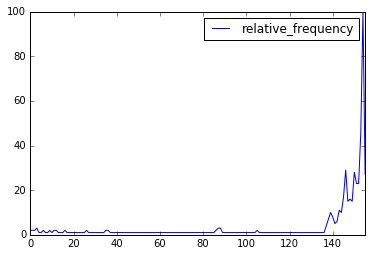

In [5]:
#Create a dataframe and plot it for demonstration purposes
%matplotlib inline

columns = ['month','relative_frequency']
frequency = GF.GetSearchFrequency(text_input)
pd.DataFrame(frequency, columns=columns).plot(kind='line')

In [6]:
#format the frequency for use in the search term lookup function

frequency_frmt = list(map(lambda x: GF.GetStartEnd(x),frequency))

In [7]:
#take the period where the search term was the most popular

frequency_max = list(filter(lambda x: x[2] == 100,frequency_frmt))[0]

### Using the max period of relevance for the search term we scrape google news search results for article URLs

In [8]:
#Using the search term and the most popular period, pull all articles from google news
    #Note: We are omitting articles from NY Times because of issues scraping their site

st_date = frequency_max[0]
end_date = frequency_max[1]

news_urls = GF.GoogleNewsLinks(text_input, st_date, end_date)
news_urls_rmv = list(filter(lambda x: GF.GetArticleDomain(x) != 'http://www.nytimes.com/',news_urls))[:2]
news_urls_rmv

['http://www.usatoday.com/story/news/politics/onpolitics/2016/12/09/washington-post-cia-report-russia-intervened-election/95230696/',
 'http://www.cnn.com/2016/12/07/politics/trump-picks-scott-pruitt-to-head-epa/']

### The immediate next step is to scrape the article text from the HTML by following the URLs from above

In [9]:
#Map the Get article function through the list of article URLs identified earlier

news_text = list(map(lambda x: GF.GetArticle(x),news_urls_rmv))
#news_text[0]

### The Next Step is to use the Watson tone analyzer

In [10]:
#For demonstration purposes - only run for 1 article

watsonresponse = GF.GetWatsonTones(news_text[0])
watsonresponse

{'document_tone': {'tone_categories': [{'category_id': 'emotion_tone',
    'category_name': 'Emotion Tone',
    'tones': [{'score': 0.419193, 'tone_id': 'anger', 'tone_name': 'Anger'},
     {'score': 0.270677, 'tone_id': 'disgust', 'tone_name': 'Disgust'},
     {'score': 0.065295, 'tone_id': 'fear', 'tone_name': 'Fear'},
     {'score': 0.004546, 'tone_id': 'joy', 'tone_name': 'Joy'},
     {'score': 0.284715, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]},
   {'category_id': 'language_tone',
    'category_name': 'Language Tone',
    'tones': [{'score': 0.292781,
      'tone_id': 'analytical',
      'tone_name': 'Analytical'},
     {'score': 0.0, 'tone_id': 'confident', 'tone_name': 'Confident'},
     {'score': 0.056841, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]},
   {'category_id': 'social_tone',
    'category_name': 'Social Tone',
    'tones': [{'score': 0.716833,
      'tone_id': 'openness_big5',
      'tone_name': 'Openness'},
     {'score': 0.999239,
      'tone_id': 'cons

#### Notice how messy the JSON object is --> Let's clean it up:

In [12]:
watson_scores = GF.convert_json(watsonresponse)
watson_scores

[['Emotion Tone', 'Anger', 0.419193],
 ['Emotion Tone', 'Disgust', 0.270677],
 ['Emotion Tone', 'Fear', 0.065295],
 ['Language Tone', 'Analytical', 0.292781],
 ['Language Tone', 'Confident', 0.0],
 ['Language Tone', 'Tentative', 0.056841],
 ['Social Tone', 'Openness', 0.716833],
 ['Social Tone', 'Conscientiousness', 0.999239],
 ['Social Tone', 'Extraversion', 0.968658]]

### Lastly Let's consider the tones as a dataframe:

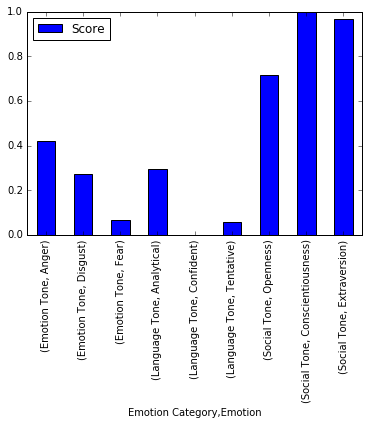

In [13]:
names = ['Emotion Category', 'Emotion', 'Score']
%matplotlib inline
sccores_df = pd.DataFrame(watson_scores, columns=names).set_index(['Emotion Category','Emotion']).plot(kind='bar')

## How to Read the Tonal Scores from Watson
#### Less than 0.5 - less likely to be perceived as that emotion
#### Greater than 0.75 - more likely to be perceived as that emotion

    - Anything between 0.5 and 0.75 is too ambiguous to solve for